# Regressão Logística

In [1]:
#Imports de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


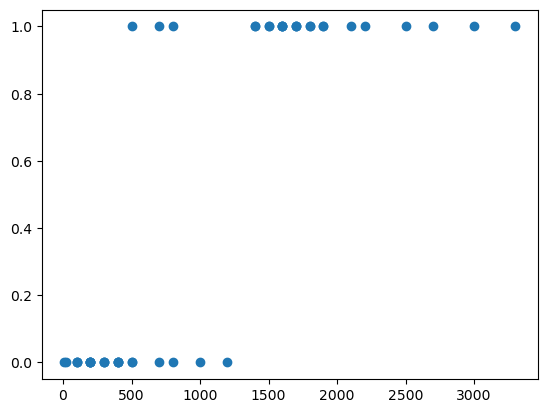

In [4]:
df_election = pd.read_csv('../data/Eleicao.csv', sep=';')
plt.scatter(df_election.DESPESAS, df_election.SITUACAO)
df_election.describe()

In [5]:
# Visualização de Coeficiente de correlação entre "DESPESAS" e "SITUACAO"
np.corrcoef(df_election.DESPESAS, df_election.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [6]:
# Criação de variaveis x e y, sendo x variavel independente e y variavel dependente
# Transformação de X para o formato de matriz adicionando um novo eixo (newaxis)
x = df_election.iloc[:, 2].values
x = x[:, np.newaxis]
y = df_election.iloc[:, 1].values
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [7]:
# Criação de modelo, treinamento e visualização dos coeficientes
model = LogisticRegressionCV()
model.fit(x, y)
model.coef_
model.intercept_

array([-4.52536538])

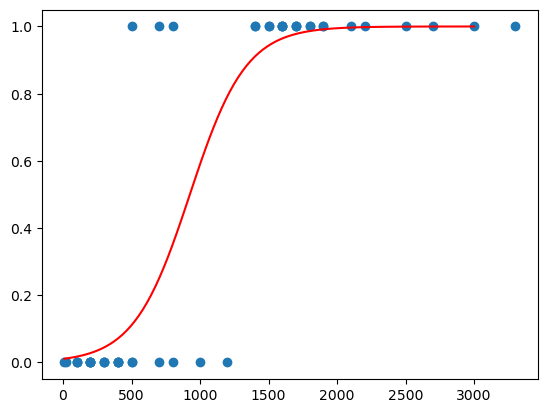

In [9]:
plt.scatter(x, y)
# Geração de novos dados para gerar a função sigmoide
x_test = np.linspace(10, 3000, 100)
# Implementação da função sigmoide
def modelo(x):
    return 1/(1 + np.exp(-x))
# Geração de previsões (variavel r) e visualização dos resultados
r = modelo(x_test * model.coef_ + model.intercept_).ravel()
plt.plot(x_test, r, color='red')


In [10]:
# Carregamento dos dados dos novos candidatos
df_previsoes = pd.read_csv('../data/NovosCandidatos.csv', sep=';')
df_previsoes

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [11]:
# mudança dos dados para a forma de matriz
despesas = df_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
# Previsões e geração da nova base de dados com os valores originais e as previsões
previsoes_teste = model.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [14]:
df_previsoes = np.column_stack((df_previsoes, previsoes_teste))
df_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)